# Effectively Using Matplotlib
from [http://pbpython.com/effective-matplotlib.html]

## Tips

* Learn the basic matplotlib terminology, specifically what is a **Figure** and an **Axes**.
* **Always** use the **object-oriented** interface. Get in the habit of using it from the start of your analysis.
* Start your visualizations with basic **pandas** plotting.
* Use **seaborn** for the more complex statistical visualizations.
* Use **matplotlib** to **customize** the pandas or seaborn visualization.

In [1]:
%matplotlib inline

## 1. Get Started

In [2]:
# 下载数据
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [3]:
# 简化
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


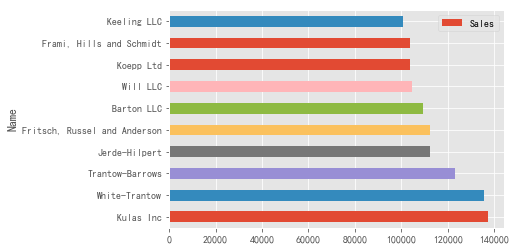

In [4]:
top_10.plot(kind='barh', x='Name', y='Sales')

## 2. Customizing the plot

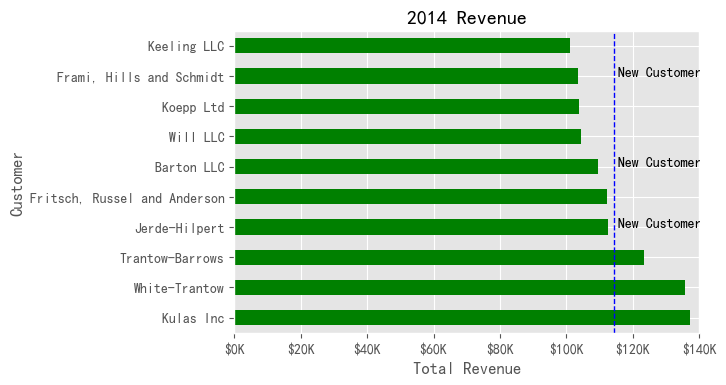

In [5]:
def currency(x, pos):
    if x >= 1E6:
        return '${:1.1f}M'.format(x*1E-6)
    return '${:1.0f}K'.format(x*1E-3)


from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(dpi=100)
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax, color='green')
avg = top_10['Sales'].mean()

ax.set_xlim([0, 14E4])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

for cust in [3, 5, 8]:
    ax.text(avg*1.01, cust, 'New Customer')
    
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

## Figures and Plots

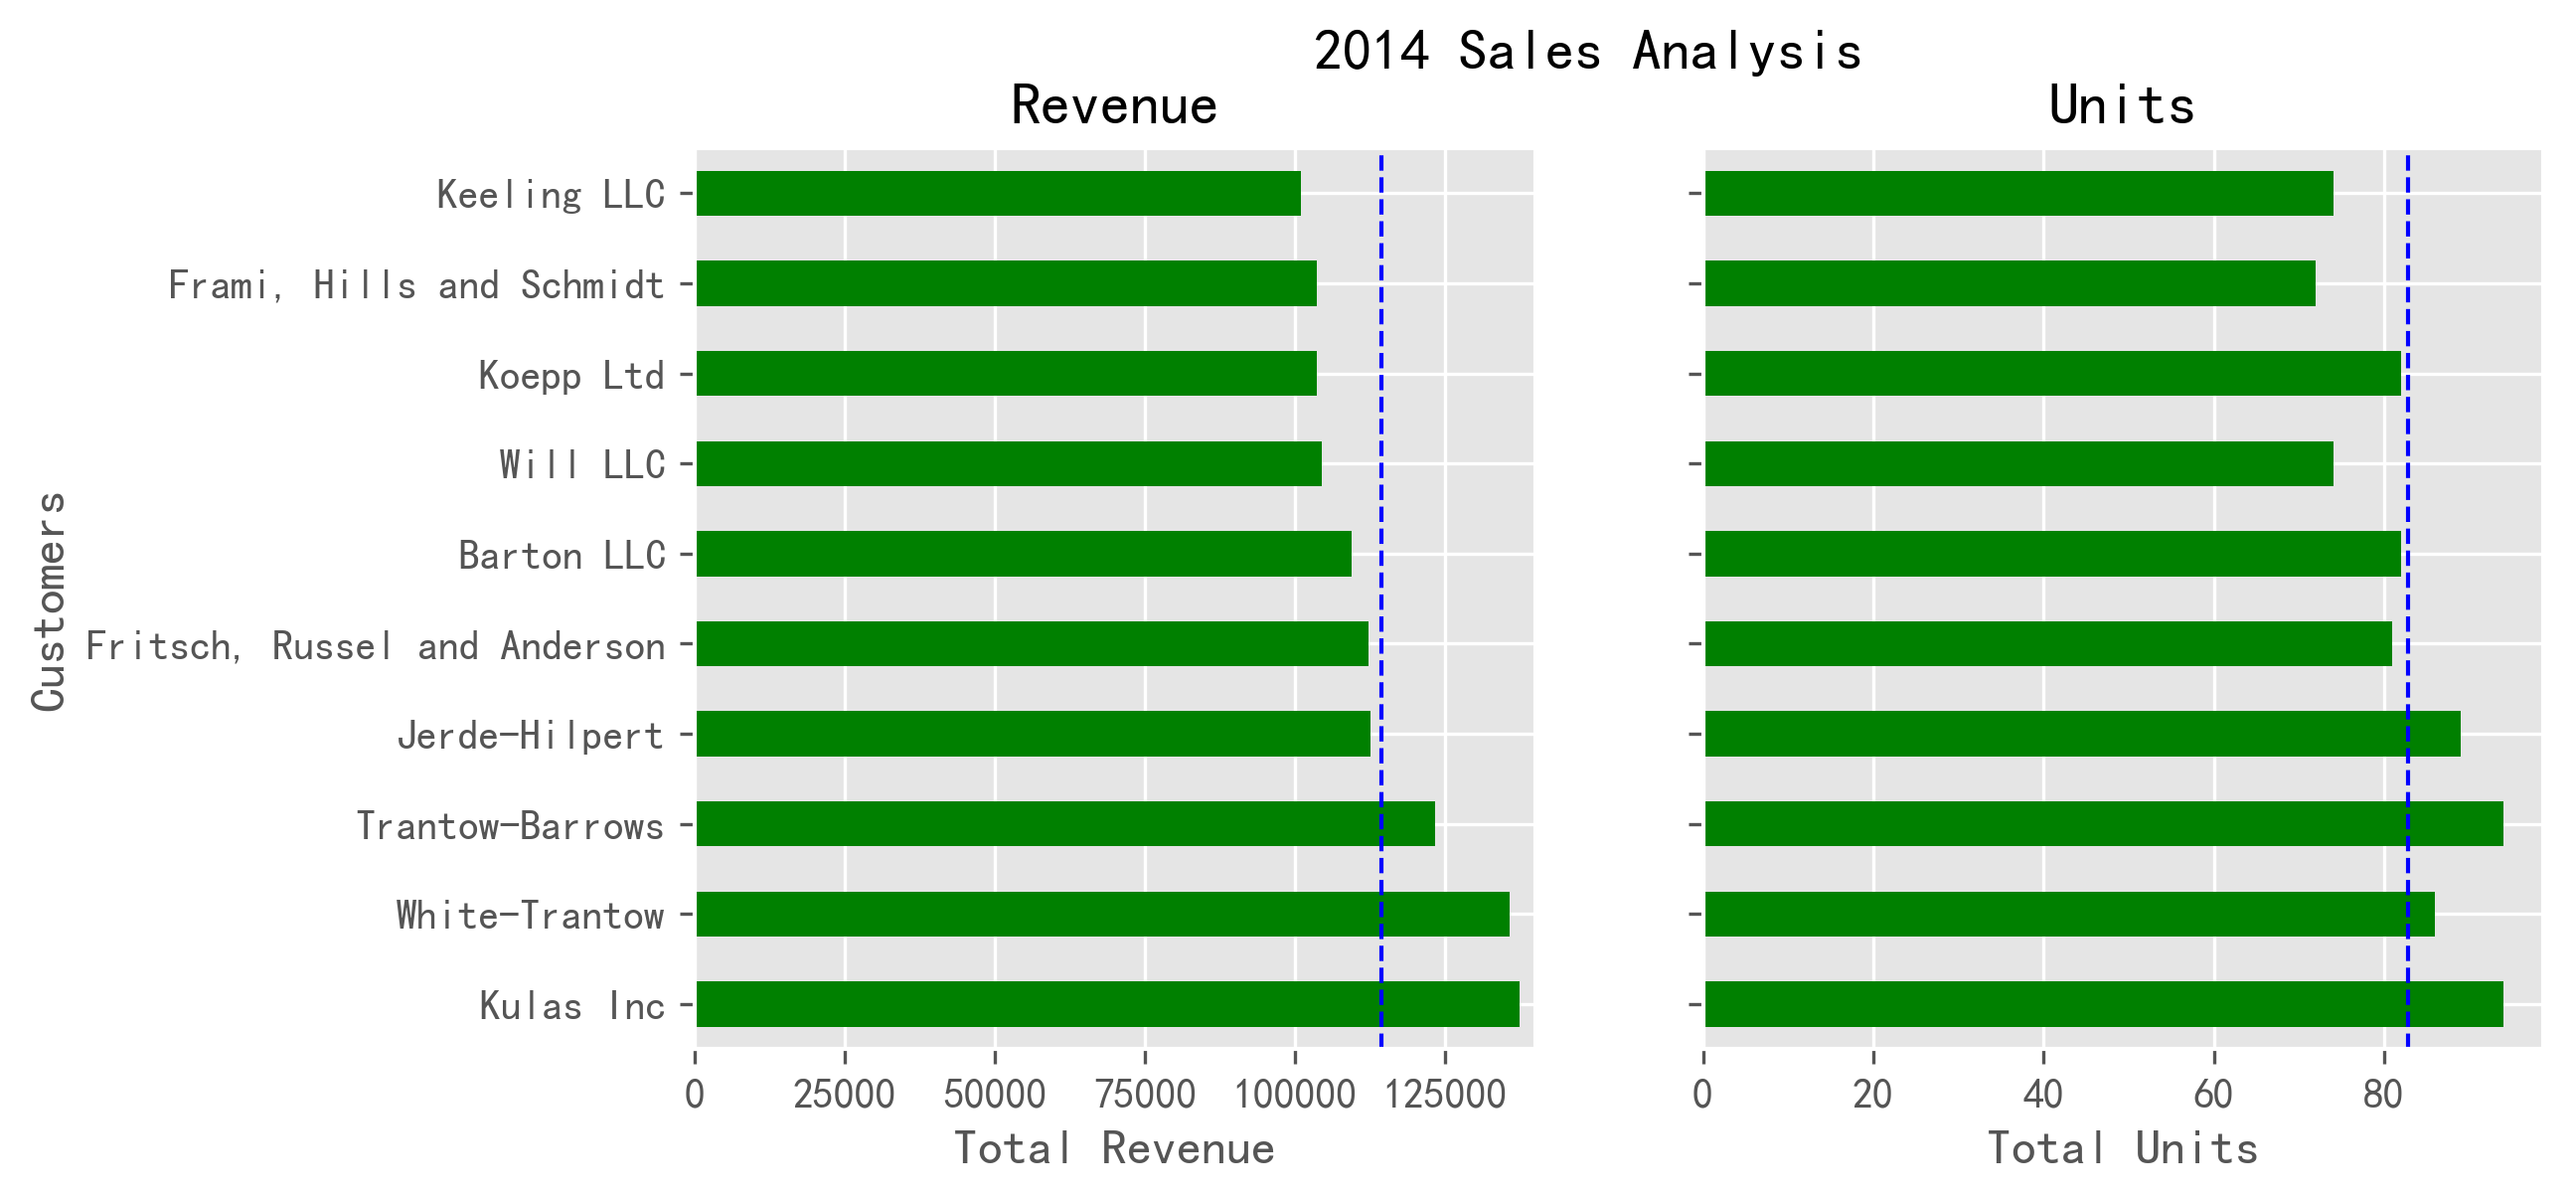

In [6]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,4), dpi=300)
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax0, color='green')
ax0.set_xlim([0, 14E4])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

top_10.plot(kind='barh', y='Purchases', x='Name', ax=ax1, color='green')
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold')

ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

In [7]:
# fig.savefig('sales.png', transparent=False, dpi=200, bbox_inches='tight')